# Neural Network
## 개요
앞서 NN의 기본적인 원리에 대해서 알아 보았듯이 복잡한 문제를 풀기 위해 더욱 깊은 층을 쌓을 수 있고, 또 선형회귀가 아닌 다른 복잡한 함수를 쓸 수도 있다. 이에 따라 구현 난이도가 기하급수적으로 늘어나 numpy 와 같은 툴로는 한계가 생긴다. 예를 들면 각 함수에 대한 도함수를 구하여 이를 chain rule에 따라 모두 곱해야 하는데, 모델의 복잡도가 높아지면 코드를 짜기 매우 어려울 것이다. 게다가 더 많은 데이터를 더 복잡한 모델로 다룰려면 엄청난 양의 연산이 필요한데, 이 때는 더욱 빠른 연산을 위해 CPU 보다는 행렬 연산에 특화된 GPU 를 쓰고 싶을 수도 있을 것이다. 이를 지원하기 위해 머신러닝 모델을 구현하는 데 있어 여러 도움을 줄 수 있는 프레임워크들이 만들어 졌다.

## Frameworks
머신러닝 프레임워크는 대표적으로 세가지가 있다.
1. Tensorflow

구글이 만든 프레임워크로 매우 널리 쓰이고 있다. 오픈소스로 돌아다니는 많은 머신러닝 모델이 이 프레임워크로 짜여져 있다. 커뮤니티가 많이 활성화 되어 있다.

2. Keras

텐서플로우 기반 프레임워크이고 여러가지 기능을 가지고 있다.

3. Pytorch

페이스북에서 개발한 프레임워크로 직관적인 문법이 강점이다. 최근에 더 유행하는 프레임워크이다.

이번 강의에서는 Pytorch를 이용할 것이다.

Pytorch(와 대부분의 머신러닝 프레임워크들)은 numpy와 같이 데이터를 프레임워크에서 지원하는 특정 자료형인 tensor로 저장한다. 따라서 numpy 와 pandas 의 DataFrame과 같은 자료형의 데이터들을 무조건 Pytorch의 Tensor 자료형으로 바꾸고 나서 연산을 해야한다. 이렇게 자료형을 까다롭게 관리하는 이유는 프레임워크에서 지원하는 여러가지 기능을 위해서이다. 대표적으로 numpy와 달리 Pytorch 에서는 tensor 에 연산을 할 때 마다 그 tensor 에 gradient을 자동으로 저장하는 놀라운 기능을 가지고 있다.

프레임워크를 다루는 것은 입문자에게는 매우 어려우니 구글링과 공식문서를 적극적으로 이용해야 한다.

## 실습: Pytorch Autograd

In [1]:
import torch
import numpy as np

In [ ]:
x = np.random.randn(10)
x=torch.tensor(x,requires_grad=True) # requires_grad 를 True 로 하여 이 tensor 에 연산이 추가 될 때 마다 기울기가 저장된다.

x # 자료형이 torch.float64(64bit 소수)임을 알 수 있다.

tensor([-1.0431,  1.5089, -0.0804,  0.5112,  1.6282, -0.2725,  0.7596, -0.6886,
        -0.5893, -1.7342], dtype=torch.float64, requires_grad=True)

In [ ]:

y1 = x * 3
y2 = y1 * y1

#z=y2.mean()
#z.backward()

#x.grad # dz/dx = 1.8x

tensor(9.6875, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [ ]:
1.8 * x

tensor([-0.5367, -0.0242, -0.7522,  0.6986,  2.1993, -1.0835, -1.3264, -1.2331,
         1.9150,  1.0231], dtype=torch.float64, grad_fn=<MulBackward0>)

위 예제처럼 tensor에 연산을 하고 마지막으로 scalar 값을 만드는 연산을 한 후 backward 메소드를 호출하면, gradient를 구할 수 있다.

행렬에 많은 연산을 하고 마지막에 Loss Function으로 scalar를 만드는 일반적인 머신러닝 모델의 패턴을 생각하면 위 기능을 직접적으로 적용할 수 있다.

Pytorch 와 같은 프레임워크는 편리한 딥러닝 모델 개발을 지원하기 위해 자주 쓰이는 함수들이 메소드로 지원된다. 이러한 메소드로 간편하게 모델을 구현할 수 있다.

## 실습: NN

In [ ]:
x = torch.rand(10) * 2 - 1 # [0, 1) -> [-1, 1)

x

tensor([-0.6303,  0.0159, -0.1818,  0.3946, -0.3433, -0.2459,  0.5975,  0.9121,
         0.5796,  0.4736])

In [ ]:
1 / (1 + torch.exp(-x))

tensor([0.3475, 0.5040, 0.4547, 0.5974, 0.4150, 0.4388, 0.6451, 0.7134, 0.6410,
        0.6162])

In [ ]:
nn.Sigmoid()(x)

tensor([0.3475, 0.5040, 0.4547, 0.5974, 0.4150, 0.4388, 0.6451, 0.7134, 0.6410,
        0.6162])

In [ ]:
y = x.clone().detach()
y[y < 0] = y[y < 0] * 0.1

y

tensor([-0.0630,  0.0159, -0.0182,  0.3946, -0.0343, -0.0246,  0.5975,  0.9121,
         0.5796,  0.4736])

In [ ]:
nn.LeakyReLU()(x)

tensor([-0.0063,  0.0159, -0.0018,  0.3946, -0.0034, -0.0025,  0.5975,  0.9121,
         0.5796,  0.4736])

In [8]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import torch
from torch.utils.data import DataLoader, TensorDataset

In [9]:
mnist = fetch_openml('mnist_784')
data = np.array(mnist.data)
target = np.array(list(map(lambda x: int(x), mnist.target)))

In [10]:
X = torch.tensor(data)
y = torch.tensor(target)

y.shape

torch.Size([70000])

In [11]:
import torch.nn as nn
import torch.optim as optim # 최적화 툴 패키지

class MyNN(nn.Module):
    def __init__(self, input_size, hidden_size, target_size, lr=1e-4):
        super(MyNN, self).__init__()
        torch.set_default_dtype(torch.float64)
        
        self.layers = nn.Sequential(
            nn.BatchNorm1d(input_size),
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, target_size),
            nn.LogSoftmax()
        )
        
        self.loss = nn.CrossEntropyLoss()
        self.optim = optim.SGD(self.parameters(), lr=lr, momentum=0.9)
        
    def forward(self, X):
        return self.layers(X)
    
    def backward(self, X, y):
        self.optim.zero_grad()
        
        out = self.forward(X)
        loss = self.loss(out, y.long())
        loss.backward()
        self.optim.step()
        
        return loss, out

In [13]:
batch_size = 64
net = MyNN(X.shape[1], 50, 10)
ds = TensorDataset(X_tr, y_tr)
loader = DataLoader(ds, 64, shuffle=True)

loss_h = []

epoch_num = 10
for epoch in range(epoch_num):
    for X_b, y_b in tqdm(loader):
        loss, p = net.backward(X_b, y_b)
        
        loss_h.append(loss.item())

NameError: ignored

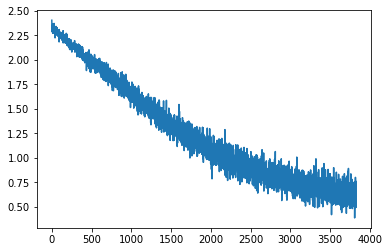

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_h)
plt.show()

In [ ]:
y_prob = net(X_t)
y_hat = y_prob.argmax(1)
acc = (y_t==y_hat).sum() / y_hat.shape[0]

acc.item()

0.893095238095238